# Gradient Descent

Gradient descent is a method for unconstrained mathematical optimization. It is a first-order iterative algorithm for finding a local minimum of a differentiable multivariate function. The idea is to take repeated steps in the opposite direction of the gradient of the function at the current point, because this is the direction of steepest descent. Conversely, stepping in the direction of the gradient will lead to a local maximum of that function; the procedure is then known as gradient ascent. It is particularly useful in machine learning for minimizing the cost or loss function. It is the core of machine learning systems as this is the algorithm that refines the learning of the systems.

In [1]:
# Importing modules
import numpy as np
import matplotlib.pyplot as plt

## Dataset

The sample dataset is a relationship between a house's size in square feet and its corresponding price in $1000s.

In [2]:
# Dataset
dataset = [
    (2104, 400),
    (1416, 232),
    (1534, 315),
    (852, 178),
    (600, 100)
]

# Descent Process

In contrast to **Simple Regression** or the **Least Squares Method**, gradient descent finds the *best-fit* line in the graph by carefully testing out the error or **loss** for each data and prediction. 

In a regression line, the formula for predicting a variable is based on the formula:

$$
  y = \beta_0 + \beta_1x
$$

<br>

<center>or informally,</center>

<br>

$$
  \text{Predicted} = \text{intercept} + \text{slope} \times \text{Weight}
$$

Let's learn how **Gradient Descent** can fit a line to data by finding the optimal values for the **intercept** and the **slope**. We'll start by using gradient descent to find the intercept. Then, once we understand how gradient descent works, we will use it to find the intercent *and* the slope.

> **Principle**: Abstract away the details.

## Step-by-step process (manual)

  * For now, we will plug the **Least Squares** estimate for the value of the slope based on the dataset above. The value of this can be found in the [simple_regression.ipynb](./simple_regression.ipynb) file.

  $$
    \text{Predicted} = \text{intercept} + 0.19284367571112385 \times \text{Weight}
  $$

  * Pick a random starting value for the intercept. In this case, for the sake of example, let's start with $10$, but any number will do.

  $$
    \text{Predicted} = 10 + 0.19284367571112385 \times \text{Weight}
  $$

  <p align='center'>
    <img src='./assets/gradient_descent/fig1.png' />
  </p>

  > We will evaluate how well the red line in the graph fits the data with the **Sum of Squared Residuals**. In machine learning, the **Sum of Squared Residuals** is a type of **Loss Function**.

  * Let's now try to calculate the residual of the first data in the dataset. The first data contains the value $(2104, 400)$. The predicted $y$-value by plugging the $x$-value into the equation for the line.

  $$
    \text{Predicted} = 10 + 0.19284367571112385 \times 2104
  $$

  * This yields to be $\text{Predicted} = 415.7430936962046$.

  * The residual is the difference between the **Predicted** value and the **Observed** value $\text{residual} = \text{predicted} - \text{observed}$. This will be $\text{Residual} = 415.7430936962046 - 400 = 15.743093696204596$.

  * Now, do this for the remaining data in the dataset and keep track of all their residuals.

  * After doing so, we will end up with a list of the residuals: 


  <br>
  
  <center>
    <pre>
      residuals = [15.743093696204596, 51.06664480695139, -9.177801459135992, -3.697188294122469, 25.706205426674302]
    </pre>
  </center>

  * For each residual, we will square the value and then sum them all up.

  <center>
    <pre>
      residuals_squared = [247.84499912747688, 2607.802211839335, 84.23203962331874, 13.669201282196214, 660.8089974383794]
      residuals_squared_sum = 3614.357449310706
    </pre>
  </center>

  * Let's look at what that would look like in the graph:

  <p align='center'>
    <img src='./assets/gradient_descent/fig2.png' />
  </p>

### What if we manually move the initial intercept lower?

  What if we change the initial intercept of $10$ to, say, $5$? $4$? How about down to $0$?

  <div style='display: grid; grid-template-columns: 1fr 1fr; gap: 10px; align-items: center; justify-content: center; margin-inline: auto;'>
    <img src='./assets/gradient_descent/fig1.png' style='width: 50%; display: block; margin-inline: auto;'/>
    <img src='./assets/gradient_descent/fig3.png' style='width: 50%; display: block; margin-inline: auto;'/>
    <img src='./assets/gradient_descent/fig4.png' style='width: 50%; display: block; margin-inline: auto;'/>
    <img src='./assets/gradient_descent/fig5.png' style='width: 50%; display: block; margin-inline: auto;'/>
  </div>

  <br>

  At first glance, the difference cannot be immediately seen. However, let's take a look at the graph of the relationship of the **Sum of Squared Residuals** and the **Intercept**.

  <p align='center'>
    <img src='./assets/gradient_descent/fig6.png' />
  </p>

  What can we observe? Notice that as we try to reduce the initial intercept - in hopes of manually fitting the best line - the value of the **Sum of Squared Residuals** is constantly decreasing.

  This is **Gradient Descent**. It slowly *descends* in a gradual manner in hopes of lowering the value of the **Sum of Squared Residuals**. Note that the **Sum of Squared Residuals** is the sum of the errors in the prediction. Basically, gradient descent is trying to **minimize** the error in its prediction gradually. 

  However, if we somehow *overshoot*, the value of the **Sum of Squared Residuals** will climb back up. Meaning that we have somehow shot past the optimal or the minimal value of the intercept.

## Step-by-step process (algorithmic)

So how do we go about this process without manually calculating each of the intercept blindly ourselves and letting the computer find the best-fit line? 

  * Let's break down the formula of the sum of the squared residuals. Let's define the following:

  $$
    wx_i=\text{Predicted value at}\ i\text{-th data entry}\
  $$

  $$
    y_i=\text{Observed value or the}\ y\text{-value at}\ i\text{-th data entry}.
  $$

  * Then, to calculate the sum of the squared residuals, we have the function:

  $$
    F(w) = \sum_{i = 0}^{n} (wx_i-y_i)^2
  $$

  $$
    \text{Where}\ n=\text{length of the dataset}
  $$

  * This formula $F(w)$ is the formula of the sum of the squared residuals, where $w$ is the primary slope value. This means that for a given slope $w$, we will refine it gradually using the fuction $F(w)$ to find the optimal line for the graph.

  * We will then update the value of our slope $w$ based on the downwards direction of the curve. But wait, how do we get the downwards direction of the curve? **Derivatives**.

  * Since we know that $F(w)$ is a function of a curve, taking its derivative will give us the slope at any point of the curve. When the derivative is negative, we are heading towards the downwards direction.

  <br>

  <center>Solving the derivative</center>

  $$
  \begin{align}

                      F(w) & = \sum_{i = 0}^{n} (wx_i-y_i)^2\\
      \frac{d} {dw} (F(w)) & = \frac{d} {dw} \big(\sum_{i = 0}^{n} (wx_i-y_i)^2\big)\\
                 \text{Simplify:}& \sum_{i = 0}^{n}\Big(\frac{d} {dw} \big((wx_i-y_i)^2\big)\Big) \\
               \text{Chain rule:}& \space \sum_{i = 0}^{n} 2 \cdot (wx_i-y_i)^{2 - 1} \\
                                 &\sum_{i = 0}^{n} 2 \cdot (\overbrace{wx_i-y_i}^{\text{derive}}) \\
      \frac{d} {dw} (F(w)) & = \sum_{i = 0}^{n} 2 \cdot (wx_i-y_i) \cdot x \\

  \end{align}
  $$

  * Now that we have the derivate of the curve, we can use this to update our slope value $w$ for each iteration or **epsiode**. However, in updating the value of our slope, we still may overshoot by a substantial amount. A workaround for this is the introduction of a limiting factor called the **learning rate**. The learning rate will help us maintain a good interval when descending down the most optimal value. Let's see this in code.

In [3]:
# Define our sum of squared residuals function: F(w)
def F(w):
  return sum((w * x - y) ** 2 for x, y in dataset)

# Define the derivative of F(w)
def dF(w):
  return sum(2 * (w * x - y) * x for x, y in dataset)

Now that we have our functions, let us try the gradient descent

In [4]:
# Gradient descent
w = 0 # Initial best-fit slope value
episodes = 100

# Storing the value of the sum of squared residuals and the corresponding slope w adjustment
w_list = []
Fw_list = []

# Learning rate
lr = 0.0000001 # Start with a small learning rate

for _ in range(episodes):
  # Get sum of squared residuals and the derivative
  value = F(w)
  gradient = dF(w)

  # Update the slope value `w`
  # Note: We use subtraction since a negative derivative value will lead us downhill.
  # In this case, since w = 0, if the gradient is negative then the value 0 will increase, meaning that w must be very high already. Conversely, if the gradient is positive, the value 0 will decrease meaning that w must be very low.
  w = w - lr * gradient 

  # Add to storage for plotting
  w_list.append(w)
  Fw_list.append(value)

Let's try plotting the generated values for the gradient descent.

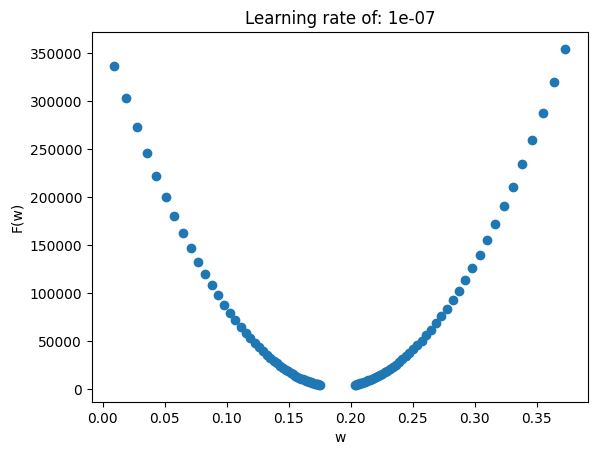

In [5]:
# Plotting the data points
plt.scatter(w_list, Fw_list)
plt.xlabel('w')
plt.ylabel('F(w)')

plt.title(f'Learning rate of: {lr}')

# plt.xlim(300_000, 400_000)
# plt.ylim(0, 0.030)

# Displaying the plot with legend
plt.show()

At a learning rate of $0.000001$, we are still overshooting. We know it is overshooting since we are seeing both sides of the curve. It is best to experiment with the learning rate to fine-tune the descent. This phenomenon is not uncommon in machine learning as a whole. Let's adjust the learning rate!

[0.00037299560000000003, 0.0007452548371592203, 0.0011167791651951664, 0.0014875700349554347, 0.0018576288944233783, 0.0022269571887237605, 0.0025955563601284, 0.0029634278480618007, 0.0033305730891067756, 0.003696993517010055]
[354733, 353343.1161243045, 351958.71461134887, 350579.7738360883, 349206.2722587774, 347838.18842463364, 346475.5009635024, 345118.18858952326, 343766.2301007972, 342419.60437905556]


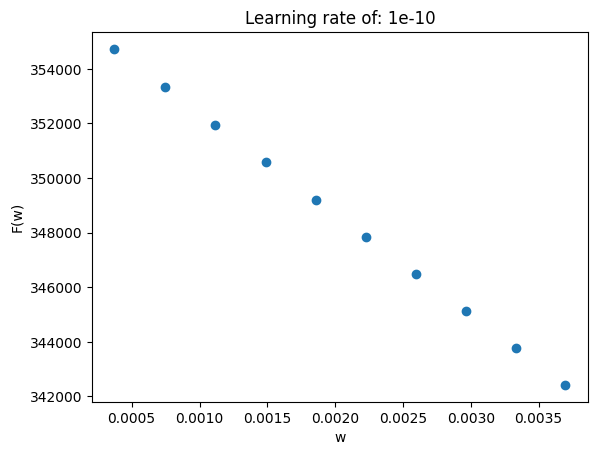

In [6]:
# Gradient descent
w = 0 # Initial best-fit slope value
episodes = 10

# Storing the value of the sum of squared residuals and the corresponding slope w adjustment
w_list = []
Fw_list = []

# Learning rate
lr = 0.0000000001 # Start with a small learning rate

for _ in range(episodes):
  # Get sum of squared residuals and the derivative
  value = F(w)
  gradient = dF(w)

  # Update the slope value `w`
  # Note: We use subtraction since a negative derivative value will lead us downhill.
  # In this case, since w = 0, if the gradient is negative then the value 0 will increase, meaning that w must be very high already. Conversely, if the gradient is positive, the value 0 will decrease meaning that w must be very low.
  w = w - lr * gradient 

  # Add to storage for plotting
  w_list.append(w)
  Fw_list.append(value)

# Plotting the data points
plt.scatter(w_list, Fw_list)
plt.xlabel('w')
plt.ylabel('F(w)')

plt.title(f'Learning rate of: {lr}')

print(w_list)
print(Fw_list)

# Displaying the plot with legend
plt.show()

As we can see, the value of our **Sum of Squared Residuals** $F(w)$ is gradually decreasing. We also printed out the value of the lists to clearly verify if the value is converging. Let's try even more episodes and try to use the optimal value of the slope $w$ to the regression line.

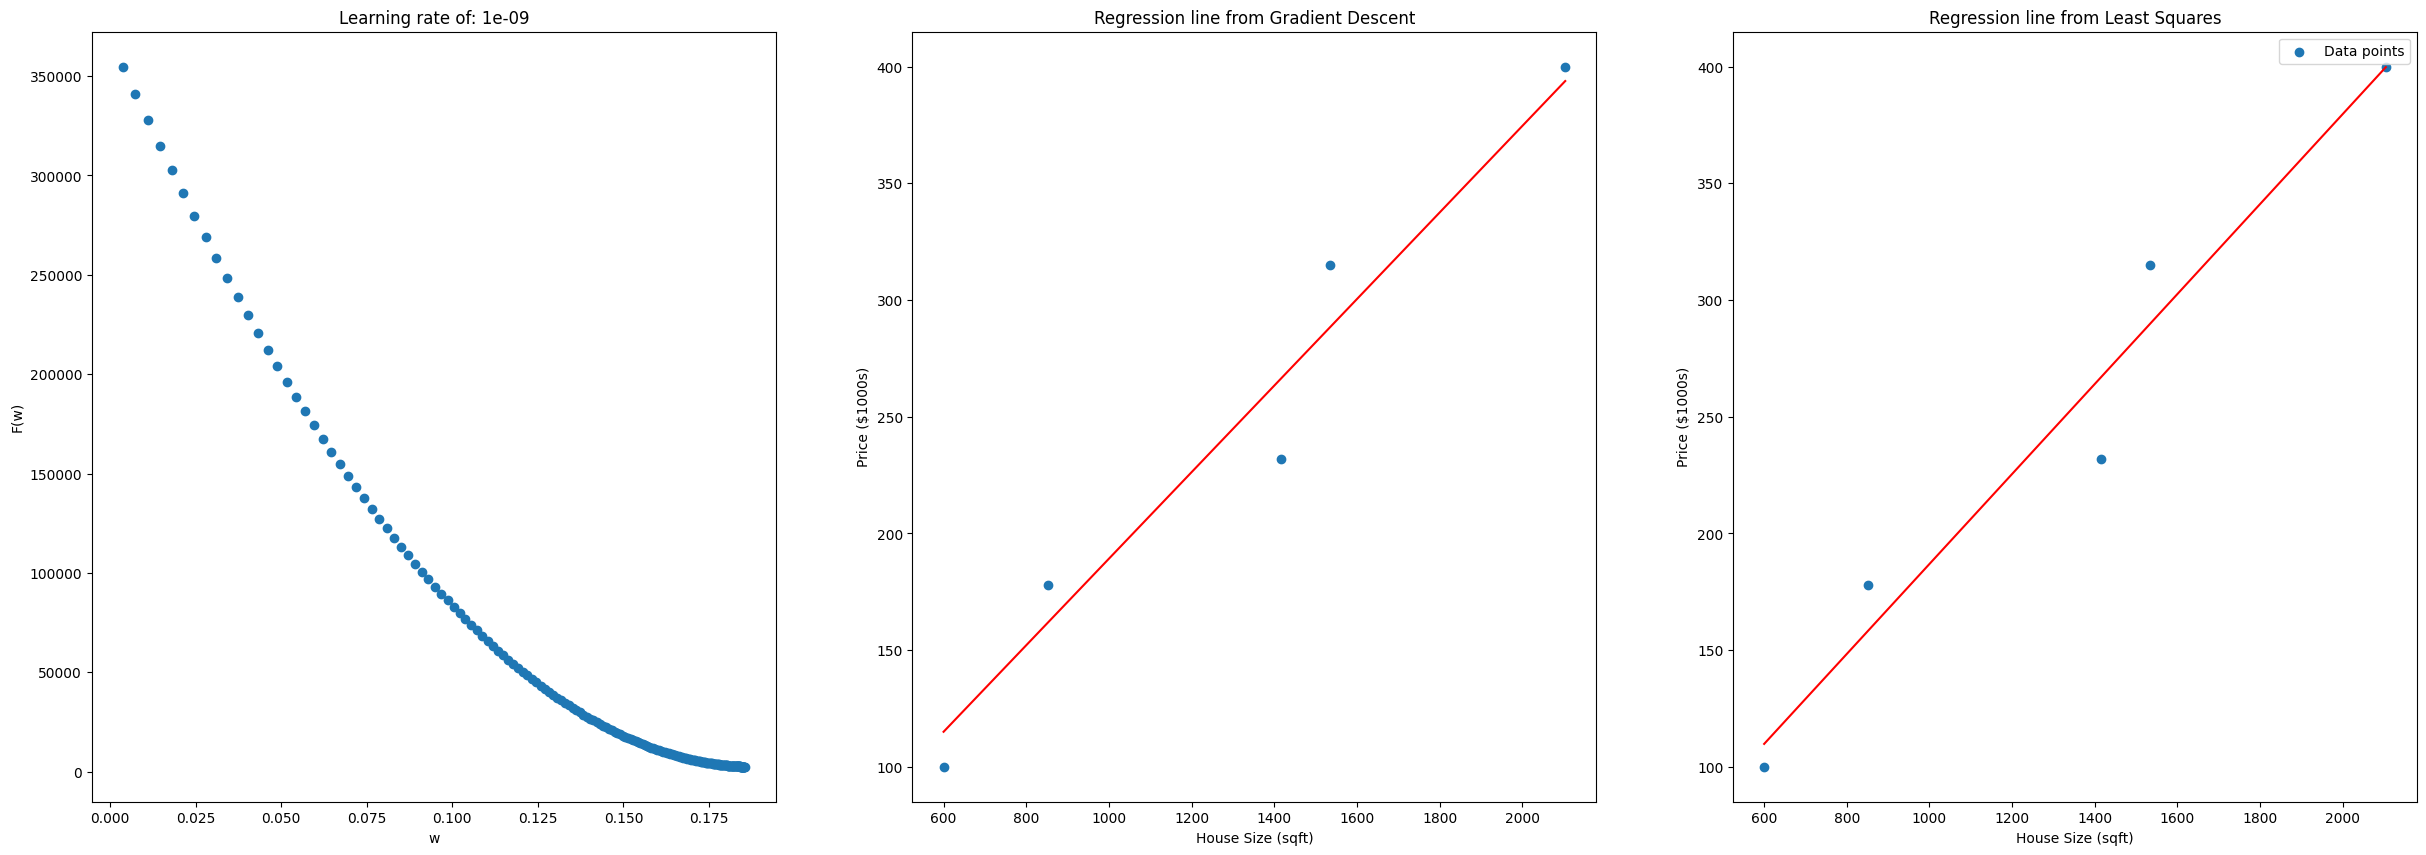

In [7]:
# Gradient descent
w = 0 # Initial best-fit slope value
episodes = 200 # Upgrade to 200 episodes

# Storing the value of the sum of squared residuals and the corresponding slope w adjustment
w_list = []
Fw_list = []

# Learning rate
lr = 0.000000001 # Start with a small learning rate, fine-tune it per experiment

for _ in range(episodes):
  # Get sum of squared residuals and the derivative
  value = F(w)
  gradient = dF(w)

  # Update the slope value `w`
  # Note: We use subtraction since a negative derivative value will lead us downhill.
  # In this case, since w = 0, if the gradient is negative then the value 0 will increase, meaning that w must be very high already. Conversely, if the gradient is positive, the value 0 will decrease meaning that w must be very low.
  w = w - lr * gradient 

  # Add to storage for plotting
  w_list.append(w)
  Fw_list.append(value)

# Taking the lowest slope `w` value and plugging it into the regression line
x = np.array([data[0] for data in dataset])
y = np.array([data[1] for data in dataset])

x_mean = np.mean(x)
y_mean = np.mean(y)

# Recall the formula: y = mx + b or y = beta_0 + beta_1 * x
# Beta_1 is the slope, this is our `w`
# We take the smallest `w` value, in this case, the last item in our `w_list`
beta_1 = w_list[-1]

# Beta_0 is calculated by y_mean - beta_1 * x_mean
# Numpy will take care of the elemental subtraction and multiplication for us
beta_0 = y_mean - beta_1 * x_mean

x_pred = np.linspace(x.min(), x.max(), 50)
y_pred = beta_0 + beta_1 * x_pred

# Let's plot the three side-by-side!
plt.figure(figsize=(30, 10))

# Plotting the data points of the gradient descent plot
plt.subplot(131)
plt.scatter(w_list, Fw_list)
plt.xlabel('w')
plt.ylabel('F(w)')
plt.title(f'Learning rate of: {lr}')

# Plotting the regression line from gradient descent
plt.subplot(132)
plt.scatter(x, y, label='Data points')
plt.plot(x_pred, y_pred, color='red')
plt.xlabel('House Size (sqft)')
plt.ylabel('Price ($1000s)')
plt.title('Regression line from Gradient Descent')

# Plotting the regression line from least squares
beta_1 = 0.19284367571112385

# Beta_0 is calculated by y_mean - beta_1 * x_mean
beta_0 = y_mean - beta_1 * x_mean

x_pred = np.linspace(x.min(), x.max(), 50)
y_pred = beta_0 + beta_1 * x_pred

plt.subplot(133)
plt.scatter(x, y, label='Data points')
plt.plot(x_pred, y_pred, color='red')
plt.xlabel('House Size (sqft)')
plt.ylabel('Price ($1000s)')
plt.title('Regression line from Least Squares')

# Displaying the plot with legend
plt.legend()
plt.show()

# Comparative Analysis
As we can see, **Gradient Descent** really is gradually descending. It first take big steps downward and smartly slow down every episode and does not overshoot. It is doing relatively well with **Least Squares** method in finding the best-fit line. Altough, you might see that **Least Squares** is doing better as it is toucing the last data point. As the scale of the graph is very big, we might not know that **Gradient Descent** is balancing out the distance of the data in the middle, resulting in the tradeoff in accuracy at the last data point. We can see in the first panel that the value of $F(w)$ converges at around $20000$.

# Visualization of Gradient Descent's Attempt in Finding the Best-Fit Line
Let's now try to visualize what has happened to the slope per episode. Since there are 200 episodes, let us narrow down and summarize the visualization to at most 10 panels.

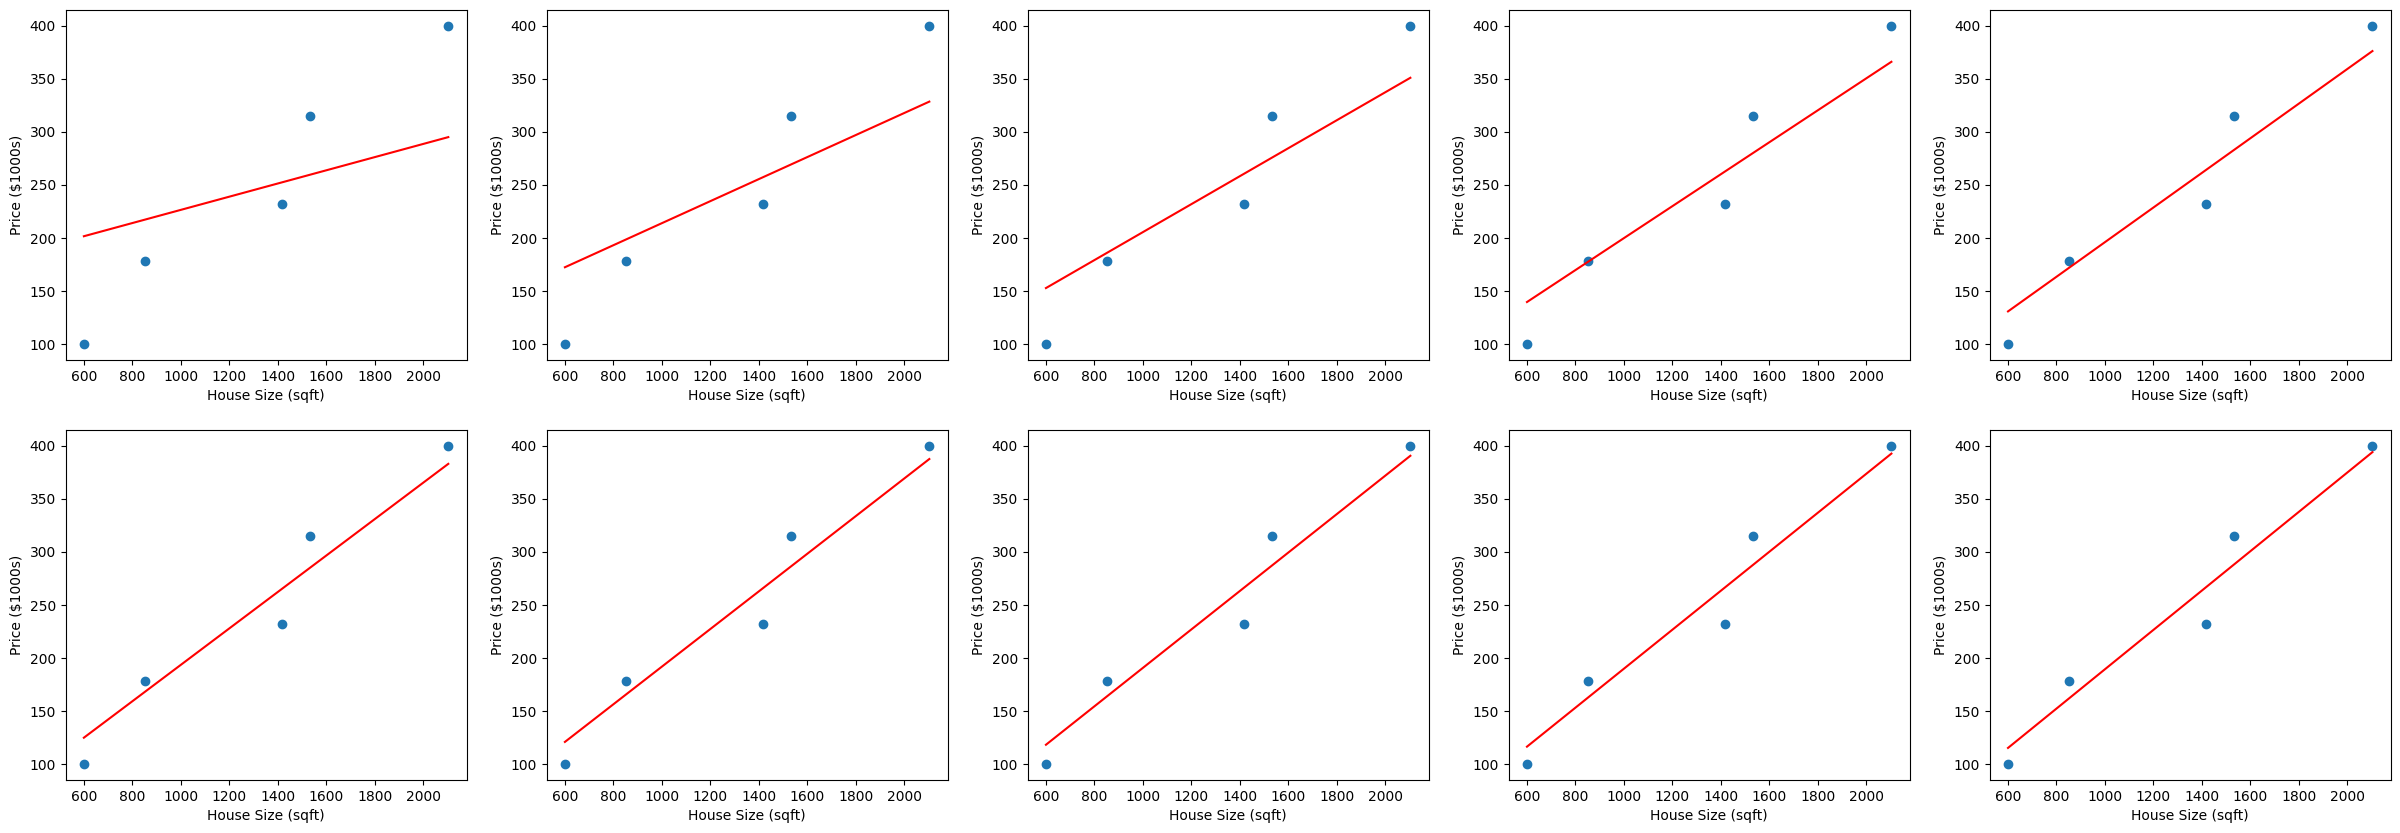

In [8]:
x_pred = np.linspace(x.min(), x.max(), 50) # This is a placeholder for the x_axis

plt.figure(figsize=(30, 10))

# Plotting the regression line from gradient descent
# 10 panels, (2 rows, 5 cols)

for row in range(2):
  for col in range(1, 6):
    plt.subplot(2, 5, row * 5 + col)
    plt.scatter(x, y)

    beta_1 = w_list[(episodes // 10 * (row * 5 + col)) - 1]
    beta_0 = y_mean - beta_1 * x_mean
    y_pred = beta_0 + beta_1 * x_pred

    plt.plot(x_pred, y_pred, color='red')
    plt.xlabel('House Size (sqft)')
    plt.ylabel('Price ($1000s)')

plt.show()

# Conclusion
After careful observation, we can clearly see that gradient descent really did great in finding the best-fit line for the given dataset. Gradient Descent is the very essence of machine learning systems today as it allows the machine to fine-tune its parameters to the expected outcome. This very algorithm is what powers artificial intelligence.

Though, it may need a few tweaks and turns, it will yield the best possible result for it will always try to find the global minima of the function. When fed with the right data and the right parameters and learning rates, the learning machine is bound to achieve great results.